In [1]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_one = Path("../project-1-group17/global-data.csv")
raw_df = pd.read_csv(file_one, encoding="UTF-8")
raw_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.93911,67.709953


In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [9]:
# drop Renewables (% equivalent primary energy) 
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
# repleaced nulls with zeros on Renewable-electricity-generating-capacity-per-capita
# Dropping Density (density\n(P/Km2) over concerns of accuracy and relevance 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()
#Questions for Prof/TA
# Do we need the data to have the same number of data points? 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [10]:
# drop Renewables (% equivalent primary energy) 
new_data_df = raw_df.drop(columns=["Renewables (% equivalent primary energy)"])
new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [11]:
# Financial flows to developing countries (US $) null/zero values assumed to be zero 
mask = pd.isna(new_data_df["Financial flows to developing countries (US $)"])
new_data_df.loc[mask, "Financial flows to developing countries (US $)"] = 0

new_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 20 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [13]:
mask = pd.isna(new_data_df["Renewable-electricity-generating-capacity-per-capita"])
new_data_df.loc[mask, "Renewable-electricity-generating-capacity-per-capita"] = 0

print(new_data_df['Renewable-electricity-generating-capacity-per-capita'].tail())

3644    62.88
3645    62.33
3646    82.53
3647    81.40
3648    80.61
Name: Renewable-electricity-generating-capacity-per-capita, dtype: float64


In [14]:
# Dropping Density (density\n(P/Km2) over concerns of accuracy and relevance 
new_data_df.drop(new_data_df.columns[16], axis=1, inplace=True)

new_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 19 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3649 non-null   float64
 5   Financial flows to developing countries (US $)                    3649 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [15]:
new_data_df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,65.957440,302.59482,1.64,760.000000,NaN,NaN,652230.0,33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,84.745766,236.89185,1.74,730.000000,NaN,NaN,652230.0,33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,81.159424,210.86215,1.40,1029.999971,NaN,179.426579,652230.0,33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,67.021280,229.96822,1.40,1220.000029,8.832278,190.683814,652230.0,33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,0.0,44.24,0.33,0.0,0.56,62.921350,204.23125,1.20,1029.999971,1.414118,211.382074,652230.0,33.93911,67.709953


In [16]:
new_data_df.corr(numeric_only=True)

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124890,0.073292,0.086321,0.109810,-0.029384,0.032615,-0.004820,0.073935,0.030126,0.004196,-0.161605,0.024759,-0.192566,0.135399,-0.001629,0.003507,0.000944
Access to electricity (% of population),0.124890,1.000000,0.866554,0.147251,-0.025445,-0.784514,0.123999,0.128713,0.138057,-0.151062,0.454870,-0.252949,0.126988,-0.112071,0.418459,0.054964,0.420548,-0.102857
Access to clean fuels for cooking,0.073292,0.866554,1.000000,0.083259,-0.053580,-0.791740,0.100752,0.163473,0.124486,-0.120110,0.551347,-0.194884,0.095629,-0.145301,0.545165,0.074630,0.432700,-0.131847
Renewable-electricity-generating-capacity-per-capita,0.086321,0.147251,0.083259,1.000000,0.045997,0.113385,0.017690,-0.047461,0.098788,0.327388,-0.081174,-0.023792,0.018405,0.017826,-0.125714,0.035178,-0.169534,-0.027171
Financial flows to developing countries (US $),0.109810,-0.025445,-0.053580,0.045997,1.000000,0.064814,0.101776,-0.009954,0.096883,0.021199,-0.096170,-0.004829,0.106098,0.040992,-0.093223,0.102777,-0.062102,0.021674
Renewable energy share in the total final energy consumption (%),-0.029384,-0.784514,-0.791740,0.113385,0.064814,1.000000,-0.134888,-0.136525,-0.068779,0.467862,-0.429362,0.247050,-0.132715,0.075236,-0.370648,-0.045395,-0.330140,0.018284
Electricity from fossil fuels (TWh),0.032615,0.123999,0.100752,0.017690,0.101776,-0.134888,1.000000,0.646716,0.845067,-0.063773,0.105529,0.030998,0.989741,0.020956,0.107793,0.627682,0.110994,0.045413
Electricity from nuclear (TWh),-0.004820,0.128713,0.163473,-0.047461,-0.009954,-0.136525,0.646716,1.000000,0.492011,0.071715,0.180833,-0.007496,0.598495,-0.048455,0.231349,0.473280,0.177961,-0.087111
Electricity from renewables (TWh),0.073935,0.138057,0.124486,0.098788,0.096883,-0.068779,0.845067,0.492011,1.000000,0.091451,0.119760,0.009425,0.856270,-0.002531,0.139674,0.704884,0.112833,-0.016380
Low-carbon electricity (% electricity),0.030126,-0.151062,-0.120110,0.327388,0.021199,0.467862,-0.063773,0.071715,0.091451,1.000000,-0.119386,0.047489,-0.054515,-0.015196,0.007945,0.044866,-0.029134,-0.045336


In [17]:
# Group the data by country and calculate the mean renewable energy share
grouped_data = new_data_df.groupby("Entity")["Renewable energy share in the total final energy consumption (%)"].mean()

# Sort the countries based on the mean renewable energy share in descending order
sorted_data = grouped_data.sort_values(ascending=False)

# Display the top 10 countries with the highest renewable energy share
top_10_countries = sorted_data.head(10)
print(top_10_countries)

Entity
Somalia                     93.8005
Uganda                      93.0705
Ethiopia                    93.0030
Burundi                     92.4315
Central African Republic    91.8745
Bhutan                      88.9885
Guinea-Bissau               88.2055
Liberia                     88.0370
Rwanda                      87.6675
Zambia                      86.8955
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


Index(['Renewable energy share in the total final energy consumption (%)'], dtype='object')


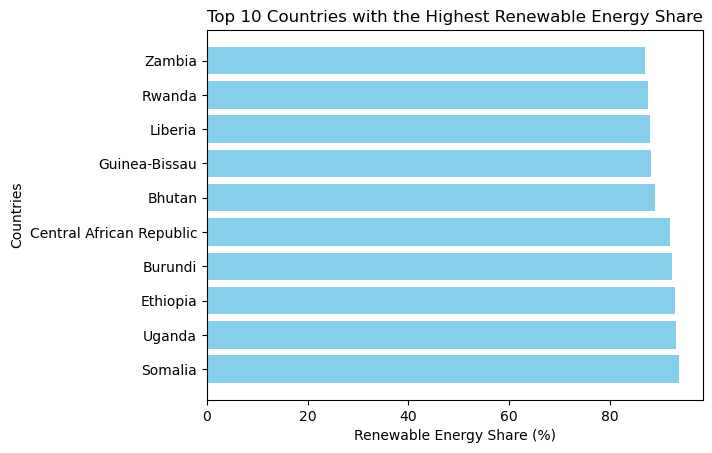

In [31]:
# Convert the Series to a DataFrame
top_10_countries_df = top_10_countries.to_frame()

# Print the column names to verify the exact column name
print(top_10_countries_df.columns)

# Create a figure and axis
fig, ax = plt.subplots()

# Replace 'Correct_Column_Name_Here' with the actual column name for renewable energy share
column_name = "Renewable energy share in the total final energy consumption (%)"

# Plot the top 10 countries with the highest renewable energy share
ax.barh(top_10_countries_df.index, top_10_countries_df[column_name], color='skyblue')

# Set labels and title
ax.set_xlabel('Renewable Energy Share (%)')
ax.set_ylabel('Countries')
ax.set_title('Top 10 Countries with the Highest Renewable Energy Share')

# Display the plot
plt.show()

In [23]:
# Group the data by country and calculate the mean renewable energy share
grouped_data = new_data_df.groupby("Entity")["Renewable energy share in the total final energy consumption (%)"].mean()

# Sort the countries based on the mean renewable energy share in ascending order
sorted_data = grouped_data.sort_values(ascending=True)

# Drop duplicates to avoid repeating countries
unique_sorted_data = sorted_data.drop_duplicates()

# Display the bottom 10 countries with the lowest renewable energy share
bottom_10_countries = unique_sorted_data.head(10)
print(bottom_10_countries)

Entity
Oman                    0.0000
Cayman Islands          0.0055
Kuwait                  0.0065
Saudi Arabia            0.0120
Turkmenistan            0.0680
Qatar                   0.0720
Nauru                   0.1340
United Arab Emirates    0.1465
Antigua and Barbuda     0.2005
Algeria                 0.2870
Name: Renewable energy share in the total final energy consumption (%), dtype: float64


Index(['Renewable energy share in the total final energy consumption (%)'], dtype='object')


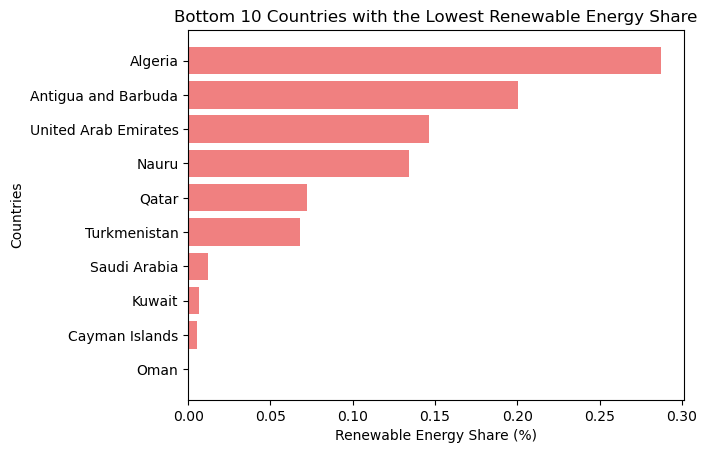

In [32]:
# Convert the Series to a DataFrame
bottom_10_countries_df = bottom_10_countries.to_frame()

# Print the column names to verify the exact column name
print(bottom_10_countries_df.columns)

# Create a figure and axis
fig, ax = plt.subplots()

# Replace 'Correct_Column_Name_Here' with the actual column name for renewable energy share
column_name = "Renewable energy share in the total final energy consumption (%)"

# Plot the bottom 10 countries with the lowest renewable energy share
ax.barh(bottom_10_countries_df.index, bottom_10_countries_df[column_name], color='lightcoral')

# Set labels and title
ax.set_xlabel('Renewable Energy Share (%)')
ax.set_ylabel('Countries')
ax.set_title('Bottom 10 Countries with the Lowest Renewable Energy Share')

# Display the plot
plt.show()

In [50]:
# Sort the DataFrame by the "Financial flows to developing countries (US $)" column in descending order
top_10_countries_financial_flows = new_data_df.sort_values(by="Financial flows to developing countries (US $)", ascending=False).drop_duplicates("Entity").head(10)

# Display the top 10 countries with the highest financial flows
print("Top 10 countries with the highest financial flows to developing countries:")
print(top_10_countries_financial_flows[["Entity", "Financial flows to developing countries (US $)"]])


Top 10 countries with the highest financial flows to developing countries:
         Entity  Financial flows to developing countries (US $)
2447    Nigeria                                    5.202310e+09
1143   Ethiopia                                    4.284370e+09
2531   Pakistan                                    3.386850e+09
997     Ecuador                                    2.811680e+09
119   Argentina                                    2.472850e+09
1550      India                                    2.112780e+09
1025      Egypt                                    2.070240e+09
3622     Zambia                                    1.791180e+09
3431     Uganda                                    1.470000e+09
751    Colombia                                    1.454760e+09


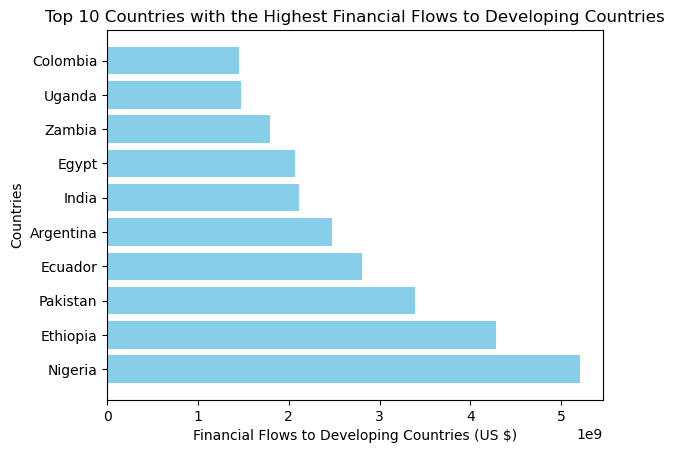

In [52]:
# Create a figure and axis
fig, ax = plt.subplots()

# Set the Entity column as the index for plotting
top_10_countries_financial_flows.set_index("Entity", inplace=True)

# Plot the top 10 countries with the highest financial flows
ax.barh(top_10_countries_financial_flows.index, top_10_countries_financial_flows["Financial flows to developing countries (US $)"], color='skyblue')

# Set labels and title
ax.set_xlabel('Financial Flows to Developing Countries (US $)')
ax.set_ylabel('Countries')
ax.set_title('Top 10 Countries with the Highest Financial Flows to Developing Countries')

# Display the plot
plt.show()

In [56]:
# Sort the DataFrame by "Financial flows to developing countries (US $)" in descending order
sorted_data = new_data_df.sort_values(by="Financial flows to developing countries (US $)", ascending=False)

# Drop duplicates based on "Entity" column to get unique countries
unique_sorted_data = sorted_data.drop_duplicates("Entity")

# Select the bottom 10 countries with the lowest financial flows
bottom_10_countries_financial_flows = unique_sorted_data.tail(10)

# Display the bottom 10 countries with financial flows
print("Bottom 10 countries with Financial Flows to Developing Countries:")
print(bottom_10_countries_financial_flows[["Entity", "Financial flows to developing countries (US $)"]])


Bottom 10 countries with Financial Flows to Developing Countries:
               Entity  Financial flows to developing countries (US $)
2510             Oman                                             0.0
634    Cayman Islands                                             0.0
2492           Norway                                             0.0
2457  North Macedonia                                             0.0
2082            Malta                                             0.0
867            Cyprus                                             0.0
833           Croatia                                             0.0
882           Czechia                                             0.0
915           Denmark                                             0.0
2198       Montenegro                                             0.0


In [67]:
# Assuming new_data_df is your DataFrame with the data
# Filter out rows with non-null values in the "Financial flows to developing countries (US $)" column
filtered_df = new_data_df.dropna(subset=['Financial flows to developing countries (US $)'])

# Calculate the minimum and maximum values in the column
min_flow = filtered_df['Financial flows to developing countries (US $)'].min()
max_flow = filtered_df['Financial flows to developing countries (US $)'].max()

# Compare the minimum and maximum values with $10,000
comparison_to_10000 = {
    'Minimum Value': min_flow,
    'Maximum Value': max_flow,
    'Comparison to $10,000': 'Below $10,000' if max_flow < 10000 else 'Above $10,000'
}

print(comparison_to_10000)
comparison_to_10000

{'Minimum Value': 0.0, 'Maximum Value': 5202310000.0, 'Comparison to $10,000': 'Above $10,000'}


{'Minimum Value': 0.0,
 'Maximum Value': 5202310000.0,
 'Comparison to $10,000': 'Above $10,000'}

In [8]:
#Questions for Prof/TA
# Do we need the data to have the same number of data points? 


In [ ]:
#testing gitkrakeen